In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os


In [2]:
data = pd.read_csv("breast-cancer.csv")


In [3]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}).astype(float)
X = data.drop(["diagnosis"], axis=1)
y = data.diagnosis.values


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


In [5]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300,
                   activation='relu', solver='adam', random_state=1)
nn.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [16]:

from sklearn import metrics

print("Testing Accuracy for Neural Net Model:", metrics.accuracy_score(y_test, y_pred_test))
print("Training Accuracy for Neural Net Model:", metrics.accuracy_score(y_train, y_pred_train))

Testing Accuracy for Neural Net Model: 0.631578947368421
Training Accuracy for Neural Net Model: 0.6263736263736264


<AxesSubplot:>

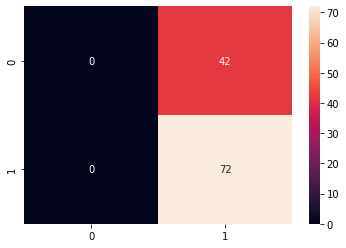

In [17]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.metrics import confusion_matrix
#Support Vector Machine Classifier

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)


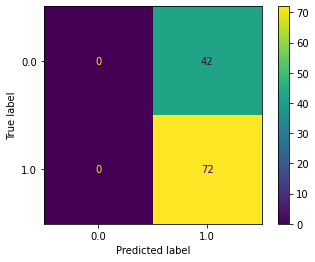

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
SVC(random_state=0)
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,                            display_labels=clf.classes_)
disp.plot()
plt.show()
